In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [6]:
covid_airline_df = pd.read_csv("./dataset/covid_airline.csv")

In [9]:
from shapely.geometry import Point
points  = [Point(x, y) for x, y in zip(covid_airline_df['LONGITUDE'], covid_airline_df['LATITUDE'])]
# Convert the radius from miles to degrees
# 1 degree = 69.172 miles
radius = 40 / 69.172 
circles = [Point(p.x, p.y).buffer(radius) for p in points]
covid_airline_gdf = gpd.GeoDataFrame(covid_airline_df, geometry=circles)
covid_airline_gdf.crs = {'init': 'epsg:4326'}
covid_airline_gdf

/Users/bianhaoji/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ORIGIN_AIRPORT_ID,YEAR,WEEK,CANCELLED,COUNT_FLIGHTS,WEATHER_CANCELLED,NAS_CANCELLED,SEC_CANCELLED,CARRIER_CANCELLED,Description,...,percent_below_poverty,fog,rain,snow,thunder,visibility,max_wind_speed,lat,lon,weekly_cases
0,10140,2020,11,7,318,1,2,2,2,"Albuquerque, NM: Albuquerque International Sun...",...,18.7,0.0,3.0,0.0,1.0,9.900000,16.820000,35.051368,-106.670163,10.0
1,10140,2020,11,7,318,1,2,2,2,"Albuquerque, NM: Albuquerque International Sun...",...,14.4,0.0,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,2.0
2,10140,2020,12,58,331,4,7,44,3,"Albuquerque, NM: Albuquerque International Sun...",...,18.7,0.0,3.0,0.0,0.0,9.957143,18.900000,35.051368,-106.670163,24.0
3,10140,2020,12,58,331,4,7,44,3,"Albuquerque, NM: Albuquerque International Sun...",...,14.4,0.0,0.0,0.0,0.0,NaN,NaN,35.688552,-106.866074,5.0
4,10140,2020,13,134,330,0,0,127,7,"Albuquerque, NM: Albuquerque International Sun...",...,23.2,0.0,0.0,0.0,0.0,10.000000,25.400000,34.715506,-106.808997,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16297,15624,2020,47,0,64,0,0,0,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,12.0,0.0,0.0,0.0,0.0,9.885714,9.700000,30.691297,-86.591760,708.0
16298,15624,2020,48,3,75,0,0,0,3,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,17.4,3.0,5.0,0.0,1.0,8.771429,12.028571,30.643586,-86.169696,177.0
16299,15624,2020,48,3,75,0,0,0,3,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,12.0,3.0,5.0,0.0,1.0,8.771429,12.028571,30.691297,-86.591760,542.0
16300,15624,2020,49,1,48,0,0,1,0,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",...,17.4,0.0,0.0,0.0,0.0,10.000000,15.900000,30.643586,-86.169696,172.0


In [11]:
covid_airline_gdf['cases_rate'] = covid_airline_gdf['cases'] / covid_airline_gdf['total_population']
covid_airline_gdf['death_rate'] = covid_airline_gdf['deaths'] / covid_airline_gdf['total_population']

<ipython-input-58-d0be9bcde574>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Blues")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


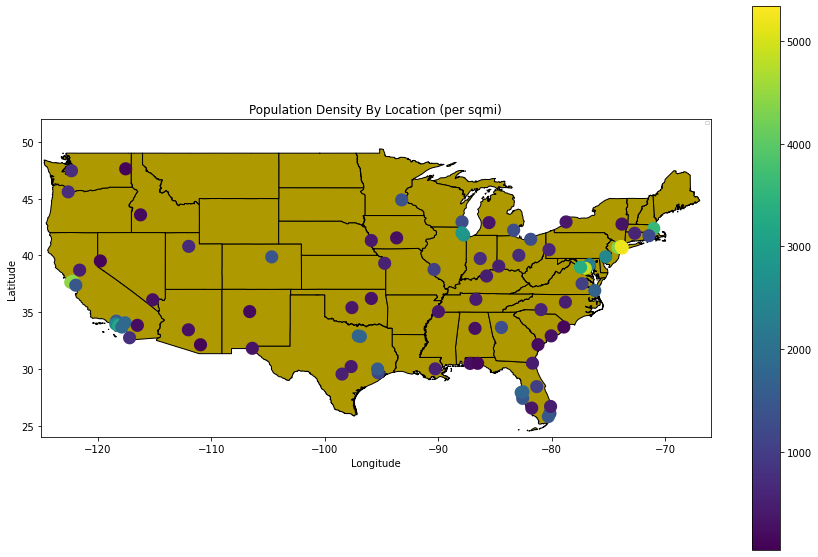

In [58]:
state_borders = gpd.read_file("./dataset/cb_2017_us_state_5m/cb_2017_us_state_5m.shp")

us_mainland = state_borders[state_borders["STUSPS"] != "AK"]
us_mainland = us_mainland.to_crs('epsg:4326')
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Blues")
county_grouped_case_airline = covid_airline_gdf.groupby(['ORIGIN_AIRPORT_ID']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'max',
     'geometry' : 'first',
     'cases_rate': 'max',
     'CANCELLED' : 'sum',
     'population_density_per_sqmi' : 'mean',
     'total_population' : 'mean'}
).reset_index()
# divide COUNT_FLIGHTS by total_population to find the flights per person
county_grouped_case_airline['flights_populations'] = county_grouped_case_airline['COUNT_FLIGHTS'] / county_grouped_case_airline['total_population']
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="population_density_per_sqmi",legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("Population Density By Location (per sqmi)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

<ipython-input-56-a1b25cfd5085>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Blues")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


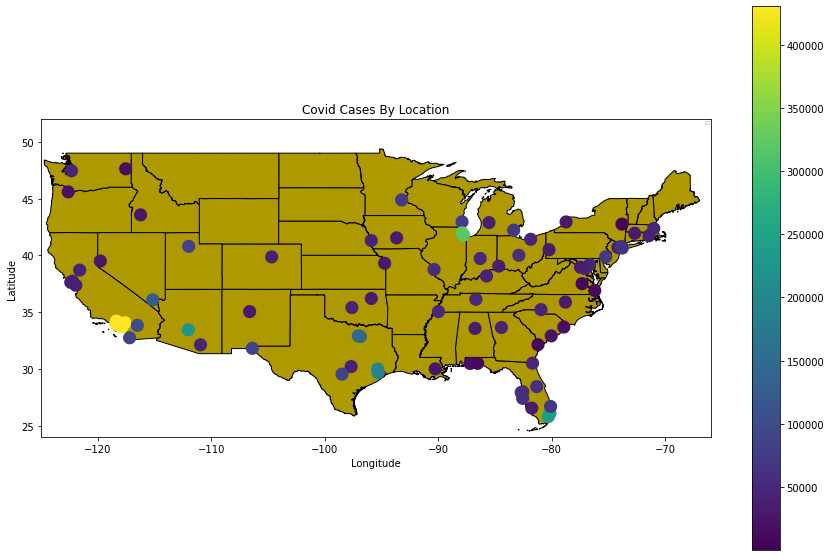

In [56]:
us_mainland = state_borders[state_borders["STUSPS"] != "AK"]
us_mainland = us_mainland.to_crs('epsg:4326')
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Blues")
county_grouped_case_airline = covid_airline_gdf.groupby(['ORIGIN_AIRPORT_ID']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'max',
     'geometry' : 'first',
     'cases_rate': 'max',
     'CANCELLED' : 'sum',
     'population_density_per_sqmi' : 'mean',
     'total_population' : 'mean'}
).reset_index()
# divide COUNT_FLIGHTS by total_population to find the flights per person
county_grouped_case_airline['flights_populations'] = county_grouped_case_airline['COUNT_FLIGHTS'] / county_grouped_case_airline['total_population']
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="cases",legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("Covid Cases By Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

<ipython-input-27-1687c2b519d6>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Blues")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


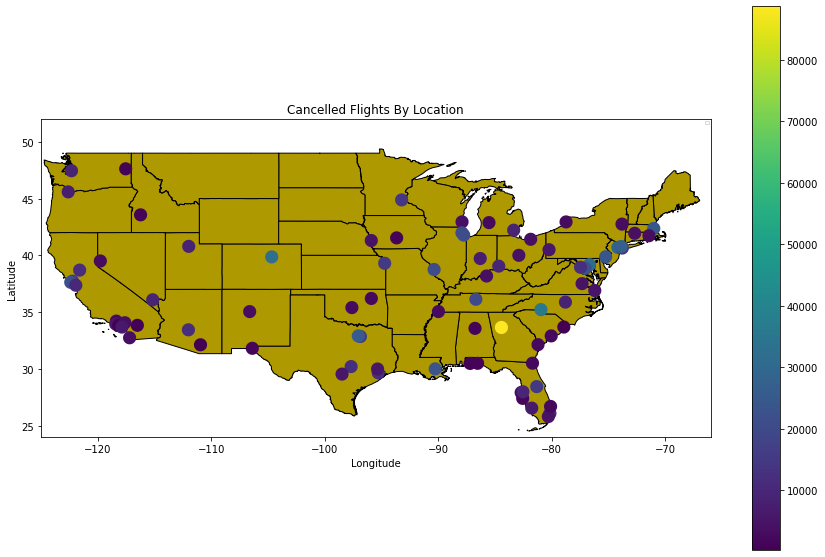

In [27]:
us_mainland = state_borders[state_borders["STUSPS"] != "AK"]
us_mainland = us_mainland.to_crs('epsg:4326')
fig, ax = plt.subplots(figsize=(15, 10))
us_mainland.plot(color="#AF9900", linewidth=1, edgecolor="black", ax=ax)
cmap = plt.cm.get_cmap("Blues")
county_grouped_case_airline = covid_airline_gdf.groupby(['ORIGIN_AIRPORT_ID']).agg(
    {'COUNT_FLIGHTS' : 'sum',
     'cases' : 'max',
     'geometry' : 'first',
     'cases_rate': 'max',
     'CANCELLED' : 'sum',
     'population_density_per_sqmi' : 'mean',
     'total_population' : 'mean'}
).reset_index()
# divide COUNT_FLIGHTS by total_population to find the flights per person
county_grouped_case_airline['flights_populations'] = county_grouped_case_airline['COUNT_FLIGHTS'] / county_grouped_case_airline['total_population']
county_grouped_case_airline = gpd.GeoDataFrame(county_grouped_case_airline, geometry='geometry')
county_grouped_case_airline.plot(column="CANCELLED",legend=True, ax = ax)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 52)
# Add title and axis labels
plt.title("Cancelled Flights By Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(fontsize=4)
# Show the plot
plt.show()

In [60]:
Atlanta_df = covid_airline_gdf[covid_airline_gdf['ORIGIN_AIRPORT_ID'] == 10397]
Atlanta_df.reset_index(inplace=True)

In [61]:
import datetime
date_stay_at_home_effective = Atlanta_df['date_stay_at_home_effective'][1]
date_stay_at_home_effective

date = datetime.datetime.strptime("2020-04-03", "%Y-%m-%d")
week_number = date.isocalendar()[1]
week_number = week_number -1
print(week_number)

13


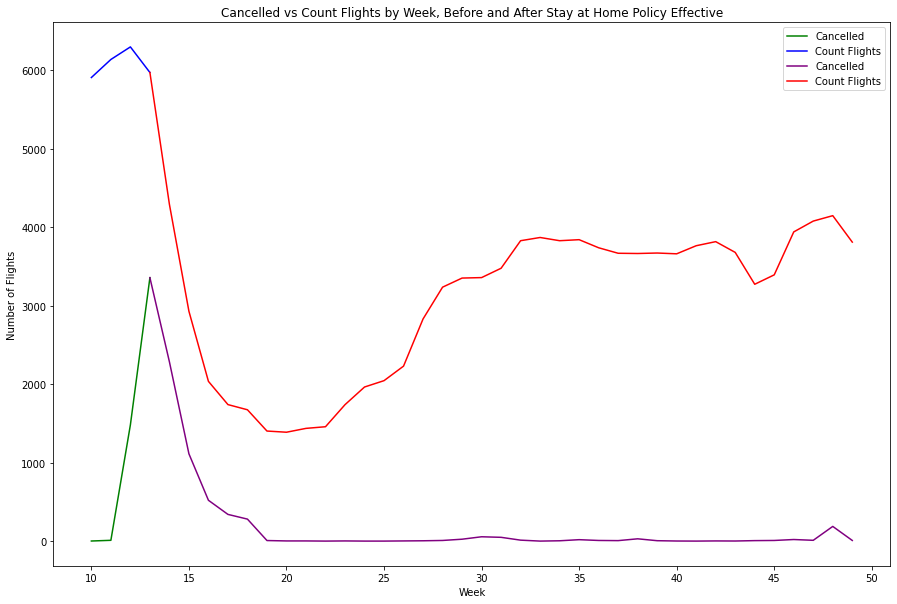

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))
Atlanta_df_bf_14 = Atlanta_df[Atlanta_df["WEEK"] <= week_number]
Atlanta_df_aft_14 = Atlanta_df[Atlanta_df["WEEK"] >= week_number]
plt.plot(Atlanta_df_bf_14["WEEK"], Atlanta_df_bf_14["CANCELLED"], label="Cancelled",  color='green')
plt.plot(Atlanta_df_bf_14["WEEK"], Atlanta_df_bf_14["COUNT_FLIGHTS"], label="Count Flights", color='blue')
plt.plot(Atlanta_df_aft_14["WEEK"], Atlanta_df_aft_14["CANCELLED"], label="Cancelled", color='purple')
plt.plot(Atlanta_df_aft_14["WEEK"], Atlanta_df_aft_14["COUNT_FLIGHTS"], label="Count Flights", color='red')
plt.xlabel("Week")
plt.ylabel("Number of Flights")
plt.title("Cancelled vs Count Flights by Week, Before and After Stay at Home Policy Effective")

plt.legend()
plt.show()